In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mimg
from tqdm import tqdm_notebook as tqdm
import pandas as pd

In [4]:
def load_test_mnist():
    data_dir = "/home/trejsu/projects/shaper_data/MNIST"

    fd = open(os.path.join(data_dir, 't10k-images.idx3-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    X = loaded[16:].reshape((10000, 28, 28, 1)).astype(np.float)

    fd = open(os.path.join(data_dir, 't10k-labels.idx1-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    Y = loaded[8:].reshape((10000)).astype(np.float)

    Y = np.asarray(Y)

    seed = 123
    np.random.seed(seed)
    np.random.shuffle(X)
    np.random.seed(seed)
    np.random.shuffle(Y)

    return X / 255., Y

In [5]:
X, Y = load_test_mnist()

In [6]:
print(X.shape)
print(Y.shape)

(10000, 28, 28, 1)
(10000,)


In [8]:
MNIST_PNG = '/home/trejsu/projects/shaper_data/MNIST/png'
MNIST_DRAWNED = '/Users/mchrusci/uj/shaper/result/evolution-strategies-classification-experiments/outputs/'
NUM_SAMPLES = 2000
NUM_ACTIONS = 100

In [19]:
seed = 1234
np.random.seed(seed)
X_idx = np.random.choice(range(X.shape[0]), NUM_SAMPLES)
np.random.seed(seed)
Y_idx = np.random.choice(range(Y.shape[0]), NUM_SAMPLES)

In [20]:
X_samples = X[X_idx]
assert len(X_samples) == NUM_SAMPLES
Y_samples = Y[Y_idx]
assert len(X_samples) == NUM_SAMPLES

In [10]:
for idx, sample in enumerate(zip(X, Y)):
    x, y = sample
    name = "mnist-{}-y-{}.png".format(idx, int(y))
    x = np.repeat(x.reshape(28, 28, 1), 3, axis=2)
    mimg.imsave(os.path.join(MNIST_PNG, name), x)

Parametry z jakimi sie rysowało:  
* alpha = 0.5
* random = 100
* sample = 10
* step = 100
* learning rate = 4.64
* sigma factor = 0.03
* optimizer = adam
* scale decay = 0.0001
* loss = mse

In [26]:
sample_idx = 0
samples = os.listdir(MNIST_PNG)
for _ in tqdm(range(NUM_SAMPLES)):
    sample = samples[sample_idx]
    input_path = "{}{}".format(MNIST_PNG, sample)
    output = sample.split(".")[0]
    output_path = "{}{}-n-%d.png".format(MNIST_DRAWNED, output)
    cmd = "python ../exp_main.py --input {} --output {} --n {} --resize 28 --output-size 28".format(input_path, output_path, NUM_ACTIONS)
    os.system(cmd)
    sample_idx += 1

In [38]:
OUTPUTS = '/Volumes/Seagate Exp/uj/magisterka/evolution-strategies/mnist-outputs-png'
RESULTS = '/Users/mchrusci/uj/shaper/result/evolution-strategies-classification-experiments/results.csv'
OUTPUTS_NPZ = '/Volumes/Seagate Exp/uj/magisterka/evolution-strategies/mnist-outputs-npz'

In [31]:
df = pd.read_csv(RESULTS)

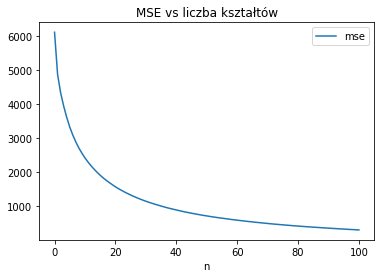

In [37]:
df[['n', 'mse']].groupby(['n']).mean().plot(title='MSE vs liczba kształtów')

In [43]:
paths_groupped_by_n = df.groupby('n')['path'].apply(list)

In [55]:
for n, paths in tqdm(enumerate(paths_groupped_by_n), f'Saving {n}-action set...'):
    X = np.zeros((len(paths), 28, 28, 1))
    Y = np.zeros((len(paths), 1))
    
    for idx, sample in enumerate(paths):
        label = sample.split('-y-')[1].split('-n-')[0]
        img = mimg.imread(os.path.join(OUTPUTS, sample))[:,:,0]
        X[idx] = img.reshape((28, 28, 1))
        Y[idx] = np.array([int(label)])
                          
    np.savez(os.path.join(OUTPUTS_NPZ, f"mnist-n-{n}"), X=X, Y=Y)

In [3]:
EVALUATE_CMD = 'python /Users/mchrusci/uj/CapsNet-Tensorflow/main.py --dataset_path=/Users/mchrusci/Desktop/mnist-outputs-npz/mnist-n-%d.npz --is_training=False --dataset=drawned-mnist'

In [9]:
for n in tqdm([0] + list(range(2, 101))):
    os.system(EVALUATE_CMD % n)

In [7]:
MNIST_SAMPLES = '/Volumes/ESD-USB/tyszka/mnist-png-2000-samples'
paths = os.listdir(MNIST_SAMPLES)
paths = [x for x in paths if x.startswith('sample')]

In [8]:
X = np.zeros((len(paths), 28, 28, 1))
Y = np.zeros((len(paths), 1))

for idx, sample in enumerate(paths):
    label = sample.split('-y-')[1].split('.')[0]
    path = os.path.join(MNIST_SAMPLES, sample)
    print(path)
    img = mimg.imread(path)[:,:,0]
    X[idx] = img.reshape((28, 28, 1))
    Y[idx] = np.array([int(label)])

np.savez(os.path.join(MNIST_SAMPLES, "mnist-samples"), X=X, Y=Y)

/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-396-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1382-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1350-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1849-y-2.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1604-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-592-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1645-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1026-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1596-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-641-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-289-y-4.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-980-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-428-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-851-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1103-y-4.png
/V

/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-253-y-2.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-558-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-420-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-644-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-44-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-406-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1541-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1189-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1953-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-814-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1551-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-23-y-4.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-906-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1397-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-855-y-9.png
/Volume

/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-478-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1498-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-500-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-939-y-4.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1377-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1897-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1125-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-481-y-2.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1135-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-893-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1036-y-2.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-315-y-2.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-41-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1706-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-952-y-7.png
/Vol

/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-710-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-296-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1012-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-145-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1709-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1374-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1078-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-880-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-306-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1830-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1312-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-591-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-258-y-4.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-727-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-64-y-7.png
/Volu

/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-506-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1441-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-236-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1214-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1493-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-343-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-463-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1881-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1638-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1701-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1162-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-830-y-2.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-277-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1553-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-670-y-3.png
/V

/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1710-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1976-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-338-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-183-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-250-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1590-y-2.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-193-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1579-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1552-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-709-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-589-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1838-y-4.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1411-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-773-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-787-y-6.png
/Vo

/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-209-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1796-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-105-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-357-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1463-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1127-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-926-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1922-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1473-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1182-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1339-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1723-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-273-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1140-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1846-y-7.png


/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-733-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-689-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1031-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-302-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-987-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1346-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-933-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-860-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1104-y-4.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-763-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-846-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-237-y-4.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1296-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1691-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-722-y-6.png
/Volu

/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1227-y-4.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1075-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1616-y-2.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1884-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1987-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1646-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-69-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-149-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1955-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-578-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-400-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-910-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1621-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-766-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1458-y-8.png
/V

/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1413-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1576-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-818-y-2.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-984-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-279-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-716-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1045-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1300-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1278-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-76-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1845-y-4.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-37-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1855-y-4.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1212-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1202-y-1.png
/Vo

/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-811-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-188-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1730-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1178-y-8.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-912-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1457-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-780-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-468-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1789-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1082-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-121-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-11-y-3.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-738-y-2.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-981-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-257-y-6.png
/Volum

/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1032-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1256-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-658-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1284-y-5.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-73-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-554-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1677-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1683-y-1.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1781-y-7.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-632-y-0.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1130-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1048-y-6.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-1207-y-9.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-460-y-4.png
/Volumes/ESD-USB/tyszka/mnist-png-2000-samples/sample-134-y-9.png
/V

In [44]:
MNIST_CLASSIFICATION_RESULTS = '/Volumes/ESD-USB/tyszka/drawned-mnist-classified'
MNIST_SAMPLES_ACCURACY = 0.9945

In [10]:
paths = os.listdir(MNIST_CLASSIFICATION_RESULTS)
paths = [x for x in paths if x.startswith('test_acc_mnist')]

In [17]:
accs = np.empty(shape=(101,))
for path in paths:
    n = int(path.split('-n-')[1].split('.')[0])
    with open(os.path.join(MNIST_CLASSIFICATION_RESULTS, path)) as csv:
        acc = float(csv.readlines()[1])
        accs[n] = acc

[0.09243243 0.09351351 0.09405405 0.09567568 0.09891892 0.10054054
 0.1027027  0.10216216 0.10486486 0.11513514 0.11675676 0.12594595
 0.13243243 0.13945946 0.14756757 0.15351351 0.16216216 0.17459459
 0.18054054 0.18972973 0.20810811 0.22540541 0.24702703 0.27513514
 0.30918919 0.33783784 0.36540541 0.39567568 0.43783784 0.47027027
 0.52054054 0.55945946 0.58648649 0.62216216 0.6572973  0.68
 0.71189189 0.73513514 0.75567568 0.78       0.80216216 0.81891892
 0.84378378 0.8627027  0.87567568 0.88972973 0.90054054 0.91081081
 0.92216216 0.92972973 0.93621622 0.94594595 0.95189189 0.95567568
 0.96108108 0.96162162 0.96702703 0.97027027 0.97351351 0.97513514
 0.97675676 0.98054054 0.98       0.98162162 0.98432432 0.98486486
 0.98594595 0.98756757 0.98756757 0.98810811 0.98972973 0.98972973
 0.98972973 0.99027027 0.99081081 0.99135135 0.99189189 0.99297297
 0.99351351 0.99297297 0.99459459 0.99459459 0.99567568 0.99567568
 0.99513514 0.99513514 0.99513514 0.99513514 0.99513514 0.99513514
 

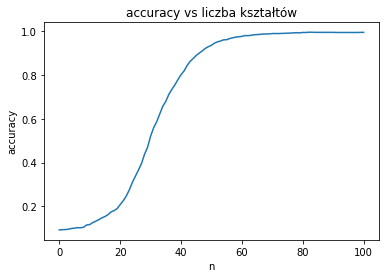

In [47]:
plt.plot(accs)
plt.title('accuracy vs liczba kształtów')
plt.xlabel('n')
plt.ylabel('accuracy')
plt.show()

In [18]:
IMAGES_DIR = '/media/trejsu/Seagate Exp/uj/magisterka/evolution-strategies/mnist-outputs-png'
MNIST_SAMPLES_DIR = '/media/trejsu/Seagate Exp/uj/magisterka/evolution-strategies/mnist-png-2000-samples'

In [9]:
images = os.listdir(IMAGES_DIR)
images[0:10]

['sample-1935-y-9-n-4.png',
 'sample-455-y-3-n-92.png',
 'sample-1507-y-4-n-98.png',
 'sample-314-y-5-n-31.png',
 'sample-277-y-7-n-64.png',
 'sample-650-y-7-n-26.png',
 'sample-1879-y-0-n-7.png',
 'sample-459-y-4-n-97.png',
 'sample-896-y-2-n-40.png',
 'sample-988-y-3-n-25.png']

In [11]:
sizes = [(img.split('-n-')[1].split('.')[0], os.path.getsize(os.path.join(IMAGES_DIR, img))) for img in images]
sizes[0:10]

[('4', 483),
 ('92', 1024),
 ('98', 993),
 ('31', 1253),
 ('64', 668),
 ('26', 915),
 ('7', 548),
 ('97', 657),
 ('40', 986),
 ('25', 1115)]

In [40]:
df = pd.DataFrame(sizes)
df = df.rename(index=int, columns={0: "n", 1: "size"})
df[0:10]

,n,size
0,4,483
1,92,1024
2,98,993
3,31,1253
4,64,668
5,26,915
6,7,548
7,97,657
8,40,986
9,25,1115


In [19]:
mnist = os.listdir(MNIST_SAMPLES_DIR)
mnist[0:10]

['sample-396-y-9.png',
 'sample-1382-y-6.png',
 'sample-1350-y-5.png',
 'sample-1849-y-2.png',
 'sample-1604-y-8.png',
 'sample-592-y-6.png',
 'sample-1645-y-7.png',
 'sample-1026-y-5.png',
 'sample-1596-y-9.png',
 'sample-641-y-8.png']

In [21]:
avg_mnist_size = sum([os.path.getsize(os.path.join(MNIST_SAMPLES_DIR, img)) for img in mnist]) / len(mnist)
avg_mnist_size

570.8250874562718

In [41]:
df.n = df.n.astype(np.int64)

In [42]:
groupped_by_size = df.groupby(['n']).mean()
groupped_by_size[0:10]

,size
n,
0,115.000000
1,214.201302
2,283.312939
3,346.286647
4,404.724987
5,456.459759
6,504.210871
7,548.979345
8,590.303734


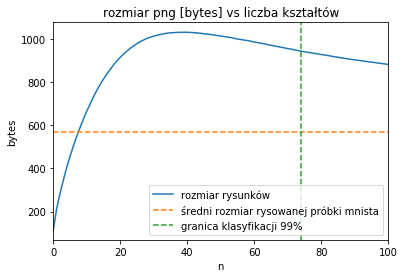

In [67]:
groupped_by_size.plot(title='rozmiar png [bytes] vs liczba kształtów')
plt.ylabel('bytes')
plt.axhline(y=avg_mnist_size, linestyle='--', c='C1')
plt.axvline(x=74, linestyle='--', c='C2')
plt.legend(['rozmiar rysunków', 'średni rozmiar rysowanej próbki mnista', 'granica klasyfikacji 99%'])
plt.show()